In [40]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
ATTACK_TARGET = "08"

"""
01	宮地研.exe
02	私達日本語本当下手
03	ポップコーン
04	Hots
05	SHA-NES
06	神ぼ大νττ
07	たけのこ映画守り隊
08	0xA
09	ステテコ泥棒
10	動的計画法
11	Gunmataro117
12	HAL
14	privocy
15	ES5 →多数決で陥落？
16	佐古研究室
17	こそっとアタック、しれっとブロック
18	匿名アノニマス
19	RITCHEY
20	KAT-TUNE
21	PR.AVATECT
22	春日部防衛隊（かすかべ防衛隊）
"""

'\n01\t宮地研.exe\n02\t私達日本語本当下手\n03\tポップコーン\n04\tHots\n05\tSHA-NES\n06\t神ぼ大νττ\n07\tたけのこ映画守り隊\n08\t0xA\n09\tステテコ泥棒\n10\t動的計画法\n11\tGunmataro117\n12\tHAL\n14\tprivocy\n15\tES5 →多数決で陥落？\n16\t佐古研究室\n17\tこそっとアタック、しれっとブロック\n18\t匿名アノニマス\n19\tRITCHEY\n20\tKAT-TUNE\n21\tPR.AVATECT\n22\t春日部防衛隊（かすかべ防衛隊）\n'

In [55]:
# fmt: off
ALL_HEADER = ['Name', 'Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '247', '260', '653', '673', '810', '885',  # noqa: E501
                      '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017',  # noqa: E501
                      '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253',  # noqa: E501
                      '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489',  # noqa: E501
                      '3877', '3889'] # noqa

B_HEADERS_LIST = [
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '247', '1920', '2017', '2087'],  # noqa: E501
  ['Gender', 'Age', 'Occupation', 'ZIP-code', '260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

B_USER_ATTRIBUTE_HEADERS = ['Gender', 'Age', 'Occupation', 'ZIP-code']

B_REVIEW_HEADERS_LIST = [
  ['260', '653', '1525', '2105', '2193', '2253', '2628', '2872', '3438', '3439', '3440', '3877', '3889'],  # noqa: E501
  ['2', '56', '260', '653', '673', '1009', '1073', '1525', '1750', '1881', '1967', '2043', '2093', '2105', '2143', '2193', '2399', '2628', '2968', '3479', '3489', '3877', '3889'],  # noqa: E501
  ['673', '1881', '1920', '2087', '2138'],  # noqa: E501
  ['2', '56', '673', '810', '885', '1009', '1073', '1097', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2043', '2087', '2093', '2138', '2399', '3438', '3439', '3440'],  # noqa: E501
  ['673', '810', '1073', '1126', '1702', '2100', '2174', '2253', '2797', '3393', '3466'],  # noqa: E501
  ['247', '885', '1097', '1654', '2086', '2138', '2872'],  # noqa: E501
  ['247', '2100', '2143', '2872', '3479'],  # noqa: E501
  ['260', '1097', '1750', '2021', '2093', '2105', '2628', '2968'],  # noqa: E501
  ['247', '1920', '2017', '2087'],  # noqa: E501
  ['260', '1097', '2628', '2174', '2797', '1073', '2100', '2968', '2105', '2193'],  # noqa: E501
]

MOVIE_IDS = ['2', '56', '247', '260', '653', '673', '810', '885', '1009', '1073', '1097', '1126', '1525', '1654', '1702', '1750', '1881', '1920', '1967', '2017', '2021', '2043', '2086', '2087', '2093', '2100', '2105', '2138', '2143', '2174', '2193', '2253', '2399', '2628', '2797', '2872', '2968', '3393', '3438', '3439', '3440', '3466', '3479', '3489', '3877', '3889']
# fmt: on

### Cデータの読み取り

In [56]:
from os import listdir

#c0~c9に対するdfのリスト
c_data_list = []

files = listdir("../data")
# files = listdir("../samples/util100/c_data")

for i in range(10):
    file = None
    for f in files:
        if f.startswith(f"C{ATTACK_TARGET}_{i}"):
            file = f
            break
    if file is None:
        print(f)
        raise("File not found")
    # c_data = pd.read_csv(f"../samples/util100/c_data/C{ATTACK_TARGET}_{i}.csv")
    c_data = pd.read_csv(f"../data/C{ATTACK_TARGET}_{i}.csv")
    c_data_list.append(c_data)

c_data_list[0]

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,2628,2872,3438,3439,3440,3877,3889
0,M,56,6,229,2,3,0,5,2,3,2,3,2,4,2,2,1
1,M,35,11,838,0,5,3,1,2,0,2,1,3,0,1,0,3
2,F,56,3,751,0,0,0,0,0,3,4,4,0,0,0,3,0
3,F,45,17,459,2,2,4,4,2,3,4,1,1,0,1,0,2
4,F,45,1,114,1,4,5,3,1,0,1,5,4,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,25,3,440,5,4,0,0,0,0,2,2,1,0,0,0,0
9996,M,25,6,436,0,0,0,0,0,0,0,0,4,0,0,0,0
9997,M,50,3,320,0,0,3,0,1,0,4,5,1,2,1,0,5
9998,M,56,14,765,1,0,3,3,0,2,2,4,0,3,2,1,0


### Ba, Bbの読み込み

In [57]:
# Ba = pd.read_csv(f"../samples/util100/B{ATTACK_TARGET}a.csv")
Ba = pd.read_csv(f"../data/B{ATTACK_TARGET}a.csv")
Ba.head()

,Name,Gender,Age,Occupation,ZIP-code
0,Mitch Willshere,M,56,0,977
1,Pippo Pordall,M,56,3,535
2,Ric MacGuffie,M,45,16,327
3,Dionis Ginity,F,25,9,463
4,Constancy Swainger,F,50,14,454


In [58]:
# Bb = pd.read_csv(f"../samples/util100/B{ATTACK_TARGET}b.csv")
Bb = pd.read_csv(f"../data/B{ATTACK_TARGET}b.csv")
Bb.head()

,2,56,247,260,653,673,810,885,1009,1073,...,2968,3393,3438,3439,3440,3466,3479,3489,3877,3889
0,3,0,0,2,4,0,3,0,4,*,...,2,1,4,0,5,3,1,1,3,5
1,0,0,3,2,5,0,0,0,0,2,...,4,0,1,0,2,0,0,0,0,4
2,0,4,5,5,5,0,0,0,0,2,...,3,1,0,0,0,2,3,3,0,0
3,4,1,5,3,2,4,2,0,*,3,...,0,0,4,0,4,5,4,5,5,5
4,4,0,0,2,0,3,4,2,2,1,...,4,1,2,3,2,0,0,2,0,0


### 攻撃に利用するGAOZと映画のIDの全ペア

In [59]:
cross_tab_pairs = []

for gaoz_header in B_USER_ATTRIBUTE_HEADERS:
    for movie_id in MOVIE_IDS:
        cross_tab_pairs.append((gaoz_header, movie_id))

cross_tab_pairs[:4]

[('Gender', '2'), ('Gender', '56'), ('Gender', '247'), ('Gender', '260')]

### C0~C9の各cross集計の平均をとる

In [60]:
# 1. c0からc9までのデータを結合
combined_data = pd.concat(c_data_list, ignore_index=True)
combined_data.astype("category")
for col in MOVIE_IDS:
    combined_data[col] = pd.Categorical(combined_data[col], categories=[0, 1, 2, 3, 4, 5], ordered=True)

combined_data.head()

,Gender,Age,Occupation,ZIP-code,260,653,1525,2105,2193,2253,...,2017,1126,2100,2174,2797,3393,3466,247,2086,2021
0,M,56,6,229,2,3,0,5,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,35,11,838,0,5,3,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F,56,3,751,0,0,0,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F,45,17,459,2,2,4,4,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F,45,1,114,1,4,5,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


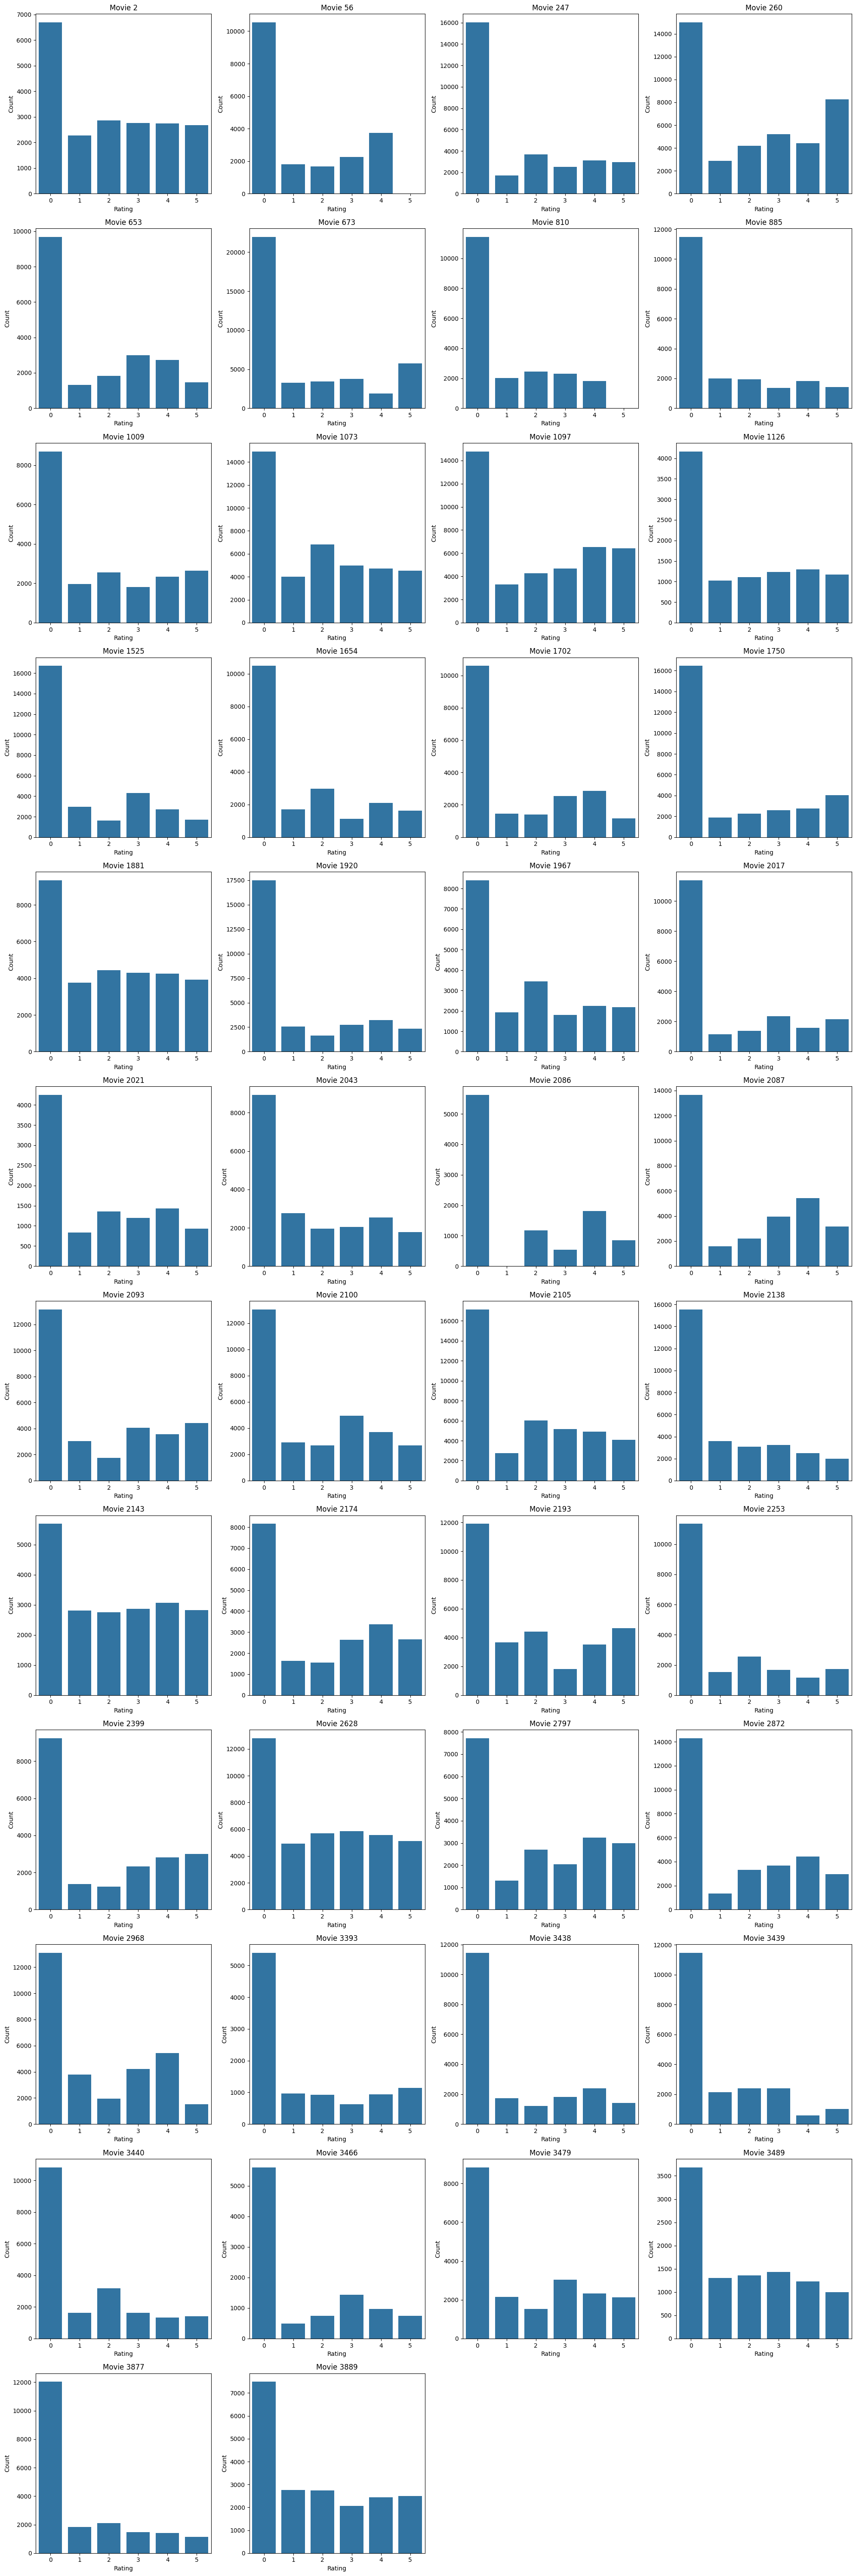

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


# 図のサイズと行列を設定
n_cols = 4
n_rows = (len(MOVIE_IDS) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))

# 各カラムに対して分布図を作成
for idx, column in enumerate(MOVIE_IDS):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    
    # カウントプロットを作成
    sns.countplot(data=combined_data, x=column, ax=ax, order=[0, 1, 2, 3, 4, 5])
    
    ax.set_title(f'Movie {column}')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Count')

# 余分なサブプロットを削除
for idx in range(len(MOVIE_IDS), n_rows * n_cols):
    row = idx // n_cols
    col = idx % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

target_movie_id = 2100 # 260, 1097, 2105, 2174, 2553, 3438

# target_movie_id の欠損値を含む行を削除
df = combined_data.dropna(subset=[str(target_movie_id)])

print(len(df))

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# 特徴量とターゲットの分離
X = df[B_USER_ATTRIBUTE_HEADERS]
y = df[str(target_movie_id)]

# トレーニングデータとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Random Forestモデルの構築
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

30000


/var/folders/22/sn7bjw057h54_810zqj94q680000gn/T/ipykernel_9307/3755394634.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])


RandomForestClassifier(random_state=42)

In [63]:
y_pred = rf_model.predict(X_test)

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.34

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1335
           1       0.19      0.16      0.17       295
           2       0.16      0.16      0.16       247
           3       0.23      0.24      0.23       476
           4       0.21      0.18      0.20       380
           5       0.14      0.12      0.13       267

    accuracy                           0.34      3000
   macro avg       0.24      0.23      0.23      3000
weighted avg       0.33      0.34      0.33      3000



In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def evaluate_movie_prediction(combined_data, target_movie_id, B_USER_ATTRIBUTE_HEADERS):
    # target_movie_id の欠損値を含む行を削除
    df = combined_data.dropna(subset=[str(target_movie_id)])
    
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
    
    # 特徴量とターゲットの分離
    X = df[B_USER_ATTRIBUTE_HEADERS]
    y = df[str(target_movie_id)]
    
    # トレーニングデータとテストデータの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    # Random Forestモデルの構築
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # 予測と評価
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return {
        'movie_id': target_movie_id,
        'accuracy': accuracy,
        'sample_size': len(df)
    }

# 評価する映画IDのリスト

# 各映画IDに対して評価を実行
results = []
for movie_id in MOVIE_IDS:
    result = evaluate_movie_prediction(combined_data, movie_id, B_USER_ATTRIBUTE_HEADERS)
    results.append(result)

# 結果をDataFrameに変換
results_df = pd.DataFrame(results)

# 結果を表示
print("Movie Rating Prediction Results:")
print(results_df.to_string(index=False))

# 結果をCSVファイルに保存（オプション）
# results_df.to_csv('movie_rating_prediction_results.csv', index=False)

# 精度の統計情報を表示
print("\nAccuracy Statistics:")
print(results_df['accuracy'].describe())

# サンプルサイズと精度の相関を確認
correlation = results_df['sample_size'].corr(results_df['accuracy'])
print(f"\nCorrelation between sample size and accuracy: {correlation:.2f}")

/var/folders/22/sn7bjw057h54_810zqj94q680000gn/T/ipykernel_9307/3689758738.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
/var/folders/22/sn7bjw057h54_810zqj94q680000gn/T/ipykernel_9307/3689758738.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
/var/folders/22/sn7bjw057h54_810zqj94q680000gn/T/ipykernel_9307/3689758738.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Movie Rating Prediction Results:
movie_id  accuracy  sample_size
       2  0.257500        20000
      56  0.417000        20000
     247  0.409667        30000
     260  0.341750        40000
     653  0.368000        20000
     673  0.449500        40000
     810  0.476000        20000
     885  0.439500        20000
    1009  0.329500        20000
    1073  0.313500        40000
    1097  0.315250        40000
    1126  0.300000        10000
    1525  0.447333        30000
    1654  0.391500        20000
    1702  0.423500        20000
    1750  0.461333        30000
    1881  0.279000        30000
    1920  0.502000        30000
    1967  0.313000        20000
    2017  0.454000        20000
    2021  0.279000        10000
    2043  0.330500        20000
    2086  0.392000        10000
    2087  0.380667        30000
    2093  0.362000        30000
    2100  0.340667        30000
    2105  0.363250        40000
    2138  0.393667        30000
    2143  0.230500        20000
    217

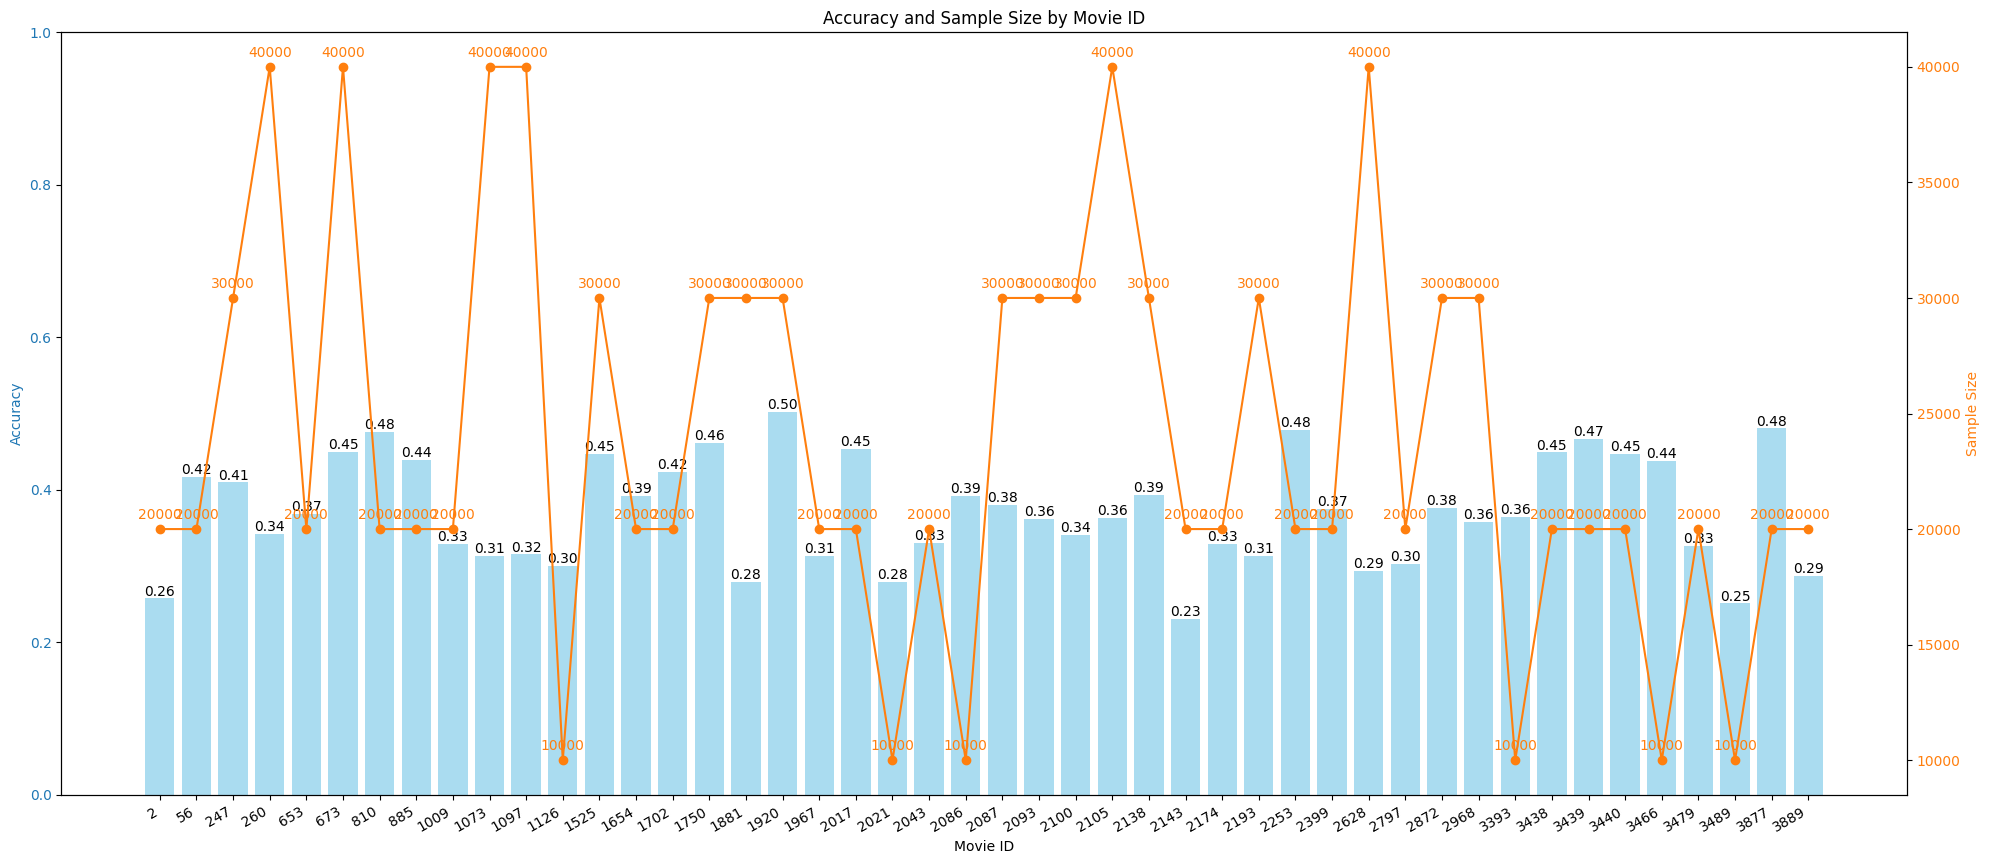


Movie Rating Prediction Results:
movie_id  accuracy  sample_size
       2  0.257500        20000
      56  0.417000        20000
     247  0.409667        30000
     260  0.341750        40000
     653  0.368000        20000
     673  0.449500        40000
     810  0.476000        20000
     885  0.439500        20000
    1009  0.329500        20000
    1073  0.313500        40000
    1097  0.315250        40000
    1126  0.300000        10000
    1525  0.447333        30000
    1654  0.391500        20000
    1702  0.423500        20000
    1750  0.461333        30000
    1881  0.279000        30000
    1920  0.502000        30000
    1967  0.313000        20000
    2017  0.454000        20000
    2021  0.279000        10000
    2043  0.330500        20000
    2086  0.392000        10000
    2087  0.380667        30000
    2093  0.362000        30000
    2100  0.340667        30000
    2105  0.363250        40000
    2138  0.393667        30000
    2143  0.230500        20000
    21

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# グラフのスタイル設定
fig, ax1 = plt.subplots(figsize=(20, 10))  # グラフの幅を広げる

# x軸のティックを設定（ラベルの間引き）
x = np.arange(len(results_df))
ax1.set_xticks(x)
ax1.set_xticklabels(results_df['movie_id'], rotation=45, ha='right')  # ラベルを45度回転

# 棒グラフの作成（Accuracy）
bars = ax1.bar(x, results_df['accuracy'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Movie ID')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Y軸の範囲を0から1に設定
ax1.set_ylim(0, 1)

# 棒グラフの上に正確な数値を表示
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# 二次軸の作成（Sample Size）
ax2 = ax1.twinx()
ax2.plot(x, results_df['sample_size'], color='tab:orange', marker='o')
ax2.set_ylabel('Sample Size', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# サンプルサイズの値を表示
for i, txt in enumerate(results_df['sample_size']):
    ax2.annotate(txt, (x[i], results_df['sample_size'][i]),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom',
                 color='tab:orange')

# グラフのタイトルと凡例
plt.title('Accuracy and Sample Size by Movie ID')
fig.tight_layout()

# x軸のラベルが重ならないように調整
plt.gcf().autofmt_xdate()

# グラフの表示
plt.show()

# 結果を表形式で表示
print("\nMovie Rating Prediction Results:")
print(results_df.to_string(index=False))

# 精度の統計情報を表示
print("\nAccuracy Statistics:")
print(results_df['accuracy'].describe())

# サンプルサイズと精度の相関を確認
correlation = results_df['sample_size'].corr(results_df['accuracy'])
print(f"\nCorrelation between sample size and accuracy: {correlation:.2f}")